# 自動車の走行距離予測

>作成日：2021/09/26  
>ファイル保存先：signate_data

## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Duplicate key in file WindowsPath('C:/Anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


## データのインポート

In [2]:
# 学習データ
data = pd.read_csv("signate_data/train.tsv", sep="\t")
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [3]:
# テストデータ
test_df = pd.read_csv("signate_data/test.tsv", sep="\t")
test_df.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


## データの確認・欠損値処理

In [4]:
data.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
# idカラムの削除
data = data.drop("id", axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           199 non-null    float64
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    float64
 3   horsepower    199 non-null    object 
 4   weight        199 non-null    float64
 5   acceleration  199 non-null    float64
 6   model year    199 non-null    int64  
 7   origin        199 non-null    int64  
 8   car name      199 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 14.1+ KB


In [7]:
# car_nameはほぼ固有値、説明変数としての有効度は低そう
data["car name"].value_counts()

ford pinto                   4
chevrolet impala             4
volkswagen dasher            3
amc gremlin                  3
chevrolet caprice classic    3
                            ..
ford escort 4w               1
buick lesabre custom         1
mercury zephyr 6             1
ford futura                  1
mazda rx-4                   1
Name: car name, Length: 167, dtype: int64

In [8]:
data = data.drop("car name", axis=1)

In [9]:
# 統計量の確認
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


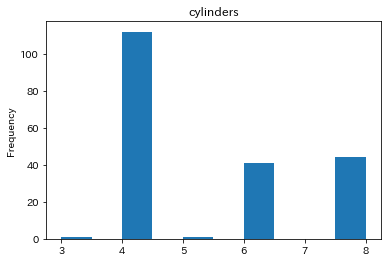

In [10]:
# cylindersの分布
data["cylinders"].plot.hist(title="cylinders")
plt.show()

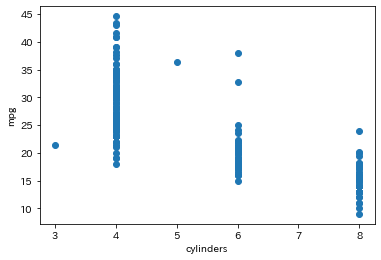

In [11]:
# cylinder散布図
plt.scatter(data["cylinders"], data["mpg"])
plt.xlabel("cylinders")
plt.ylabel("mpg")
plt.show()

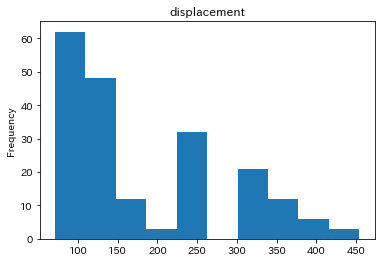

In [12]:
# displacementの分布
data["displacement"].plot.hist(title="displacement")
plt.show()

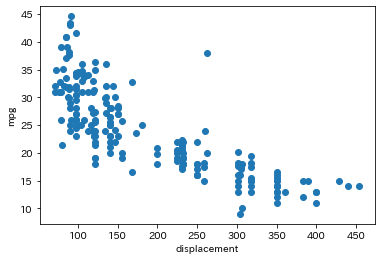

In [13]:
# displacementの散布図
plt.scatter(data["displacement"], data["mpg"])
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

<AxesSubplot:title={'center':'displacement_log'}, ylabel='Frequency'>

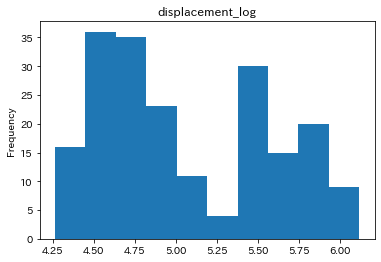

In [14]:
# displacementの対数化
data["displacement_log"] = np.log(data["displacement"])
data["displacement_log"].plot.hist(title="displacement_log")

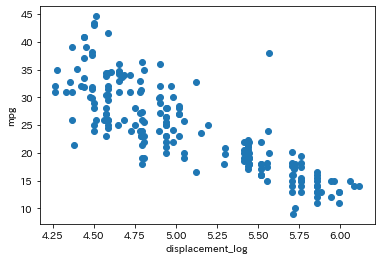

In [15]:
# displacement_logの散布図
plt.scatter(data["displacement_log"], data["mpg"])
plt.xlabel("displacement_log")
plt.ylabel("mpg")
plt.show()

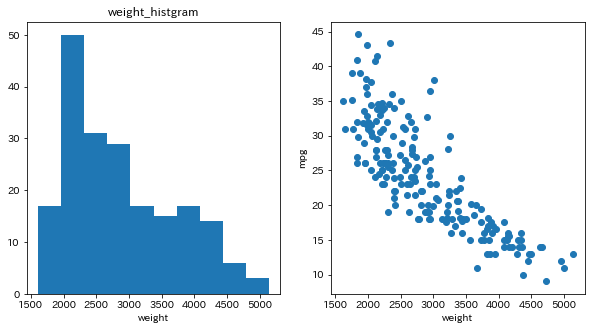

In [16]:
# weightについて
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data["weight"])
axes[0].set_title("weight_histgram")
axes[0].set_xlabel("weight")
axes[1].scatter(data["weight"], data["mpg"])
axes[1].set_xlabel("weight")
axes[1].set_ylabel("mpg")
plt.show()

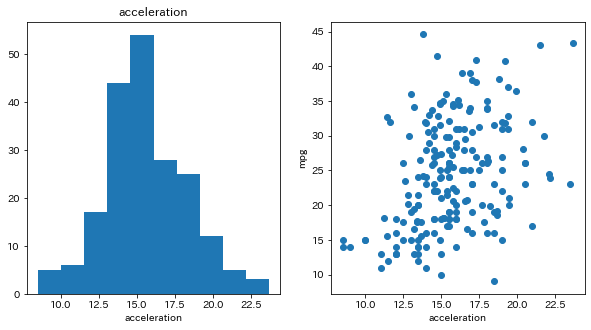

In [17]:
# accelerationについて
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data["acceleration"])
axes[0].set_title("acceleration")
axes[0].set_xlabel("acceleration")
axes[1].scatter(data["acceleration"], data["mpg"])
axes[1].set_xlabel("acceleration")
axes[1].set_ylabel("mpg")
plt.show()

In [18]:
# accelerationについて　その２
# data["acceleration"].value_counts().plot.bar(title="acceleration")

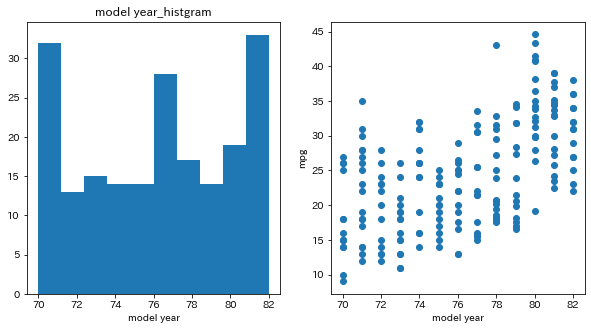

In [19]:
# model yearについて
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data["model year"])
axes[0].set_title("model year_histgram")
axes[0].set_xlabel("model year")
axes[1].scatter(data["model year"], data["mpg"])
axes[1].set_xlabel("model year")
axes[1].set_ylabel("mpg")
plt.show()

<AxesSubplot:title={'center':'model year'}>

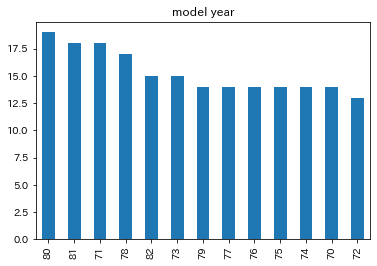

In [20]:
# 棒グラフ
model_year_count = data["model year"].value_counts()
model_year_count.plot.bar(title="model year")

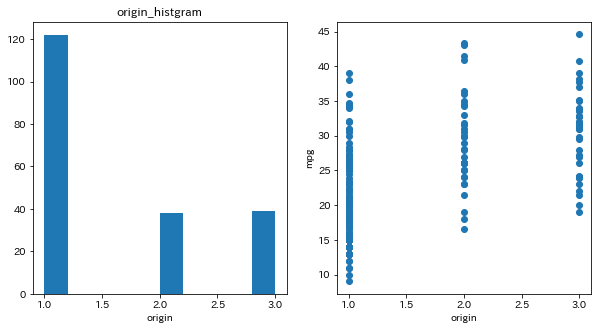

In [21]:
# originについて
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data["origin"])
axes[0].set_title("origin_histgram")
axes[0].set_xlabel("origin")
axes[1].scatter(data["origin"], data["mpg"])
axes[1].set_xlabel("origin")
axes[1].set_ylabel("mpg")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


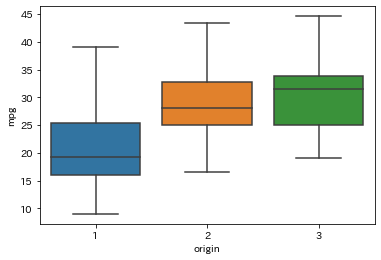

In [22]:
# 箱ひげ図
sns.boxplot("origin", "mpg", data=data)
plt.show()

In [23]:
# 相関関係
corr_matrix = data.corr()
corr_matrix
# sns.heatmap(corr_matrix)
# plt.show()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,displacement_log
mpg,1.000000,-0.770160,-0.804635,-0.820660,0.379721,0.568471,0.533671,-0.825904
cylinders,-0.770160,1.000000,0.950600,0.893256,-0.479561,-0.303462,-0.497373,0.931891
displacement,-0.804635,0.950600,1.000000,0.933038,-0.523955,-0.329817,-0.579805,0.979846
weight,-0.820660,0.893256,0.933038,1.000000,-0.401757,-0.265562,-0.535893,0.935477
acceleration,0.379721,-0.479561,-0.523955,-0.401757,1.000000,0.194854,0.189193,-0.486059
model year,0.568471,-0.303462,-0.329817,-0.265562,0.194854,1.000000,0.124279,-0.277784
origin,0.533671,-0.497373,-0.579805,-0.535893,0.189193,0.124279,1.000000,-0.630162
displacement_log,-0.825904,0.931891,0.979846,0.935477,-0.486059,-0.277784,-0.630162,1.000000


### データについて
・idは固有値で説明変数にはならない  
・car nameもほぼ固有値で説明変数としての有効度は低いと考えられるため除く。  
  
・cylindersについて  
>・cylindersの数値が小さい（シリンダーの数が少ない）ほど、燃費は良い傾向にあると考えられる  

・displacementについて  
>・小さい値ほど度数が高く、大きい値になるにつれて度数は低下していくことから、指数分布となっている。  
・分布についても、指数関数のようになっているため、対数化を行う。  
・displacementの値が200前後（対数化だと5.25前後）で傾向が大きく変わる。異なる特性の分布になっている可能性がある。  
⇒ひとまず対数化したものでモデルを作成する。  

・weightについて  
>・やや指数分布より。対数化を検討。  

・accelerationについて  
>・正規分布だが、mpgとの線形関係は低い  
・カテゴリ変数？

・model yearについて  
>・カテゴリ変数。  
・最新型になるにつれ燃費性能は上がっていくことが分かる。  

・originについて  
>・よくわからないデータだが、値が大きくなるにつれmpgの平均値が高くなっていることから、燃費性能との関係性はありそう。  
・モデルに入れるかどうか精度改善の時に判断する。  



In [29]:
# テストデータの整備
test_df = test_df.drop("id", axis=1)
test_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [30]:
test_df["displacement_log"] = np.log(test_df["displacement"])

## 燃費予測モデルの作成

In [24]:
# ライブラリのインポート
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

In [31]:
# 変数の準備（学習データ）
X = data[["cylinders", "displacement_log", "weight", "acceleration", "model year", "origin"]]
# X_dummy = pd.get_dummies(X)
y = data["mpg"]

,cylinders,displacement_log,weight,acceleration,model year,origin
0,4,4.905275,2525.0,16.0,82,1
1,4,4.488636,1925.0,14.0,79,2
2,6,5.049856,2930.0,15.5,76,3
3,4,4.499810,2125.0,14.5,74,1
4,4,4.488636,2050.0,17.3,81,3
...,...,...,...,...,...,...
194,4,4.442651,2110.0,19.2,80,3
195,8,5.710427,3570.0,12.8,78,1
196,8,5.717028,3433.0,12.0,70,1
197,4,4.499810,2335.0,23.7,80,2


In [33]:
# 変数の準備（テストデータ）
X_test = test_df[["cylinders", "displacement_log", "weight", "acceleration", "model year", "origin"]]
# X_test_dummy = pd.get_dummies(X)

In [26]:
lr = LR()
lr.fit(X, y)

LinearRegression()

In [37]:
y_pred_train = lr.predict(X)

In [38]:
mse_train = MSE(y, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(rmse_train)

3.199933828628729


## 結果の可視化

In [40]:
max_train = max(y)
min_train = min(y)
max_pred_train = max(y_pred_train)
min_pred_train = min(y_pred_train)
max_value = np.maximum(max_train, max_pred_train)
min_value = np.minimum(min_train, min_pred_train)

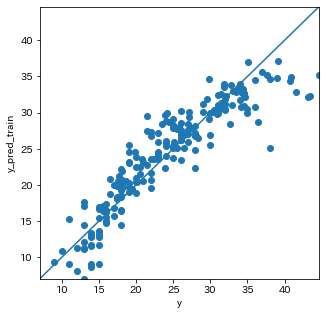

In [46]:
plt.figure(figsize=(5,5))
plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])
plt.scatter(y, y_pred_train)
plt.plot((min_value, max_value), (min_value, max_value))
plt.xlabel("y")
plt.ylabel("y_pred_train")
plt.show()